# Project 2

###  1- Import libraries

In [203]:
import pandas as pd
from pandas import json_normalize
import requests 
import json
import os
import time
import sys
import seaborn as sns
import matplotlib as plt
import numpy as np
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt

In [108]:
df1 = pd.read_csv("data/charts-top100.csv")
df1

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18
...,...,...,...,...,...,...,...
330082,1958-08-04,96,Over And Over,Thurston Harris,NaN,96,1
330083,1958-08-04,97,I Believe In You,Robert & Johnny,NaN,97,1
330084,1958-08-04,98,Little Serenade,The Ames Brothers,NaN,98,1
330085,1958-08-04,99,I'll Get By (As Long As I Have You),Billy Williams,NaN,99,1


In [109]:
daft_punk_df = df1[df1['artist'].str.contains('Daft Punk', case=False)].sort_values('rank')
daft_punk_df_filtered = daft_punk_df[daft_punk_df['artist'].str.startswith('Daft Punk')]
daft_punk_df_filtered


,date,rank,song,artist,last-week,peak-rank,weeks-on-board
43201,2013-07-27,2,Get Lucky,Daft Punk Featuring Pharrell Williams,2.0,2,13
43301,2013-07-20,2,Get Lucky,Daft Punk Featuring Pharrell Williams,2.0,2,12
43401,2013-07-13,2,Get Lucky,Daft Punk Featuring Pharrell Williams,2.0,2,11
43501,2013-07-06,2,Get Lucky,Daft Punk Featuring Pharrell Williams,2.0,2,10
43601,2013-06-29,2,Get Lucky,Daft Punk Featuring Pharrell Williams,3.0,2,9
...,...,...,...,...,...,...,...
108288,2001-02-10,89,One More Time,Daft Punk,NaN,89,1
108188,2001-02-17,89,One More Time,Daft Punk,89.0,89,2
106994,2001-05-12,95,One More Time,Daft Punk,88.0,61,14
106895,2001-05-19,96,One More Time,Daft Punk,95.0,61,15


In [110]:
daft_punk_df.sample()

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
24316,2017-03-11,17,Starboy,The Weeknd Featuring Daft Punk,14.0,1,23


In [111]:
michael_jackson_df = df1[df1['artist'].str.contains('Michael Jackson', case=False)].sort_values('rank')
michael_jackson_df_filtered = michael_jackson_df[michael_jackson_df['artist'].str.startswith('Michael Jackson')]
michael_jackson_df_filtered

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
176300,1988-01-23,1,The Way You Make Me Feel,Michael Jackson,3.0,1,10
201800,1983-03-05,1,Billie Jean,Michael Jackson,4.0,1,7
201700,1983-03-12,1,Billie Jean,Michael Jackson,1.0,1,8
201600,1983-03-19,1,Billie Jean,Michael Jackson,1.0,1,9
201500,1983-03-26,1,Billie Jean,Michael Jackson,1.0,1,10
...,...,...,...,...,...,...,...
152299,1992-09-05,100,In The Closet,Michael Jackson,90.0,6,20
93299,2003-12-27,100,One More Chance,Michael Jackson,98.0,83,4
176899,1987-12-19,100,Bad,Michael Jackson,71.0,1,14
93199,2004-01-03,100,One More Chance,Michael Jackson,100.0,83,5


In [112]:
ewf_df = df1[df1['artist'].str.contains('Earth, Wind & Fire', case=False)].sort_values('rank')
ewf_df_filtered = ewf_df[ewf_df['artist'].str.startswith('Earth, Wind & Fire')]
ewf_df_filtered

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
242387,1975-05-24,1,Shining Star,"Earth, Wind & Fire",4.0,1,15
219901,1979-09-15,2,After The Love Has Gone,"Earth, Wind & Fire",3.0,2,11
219801,1979-09-22,2,After The Love Has Gone,"Earth, Wind & Fire",2.0,2,12
207702,1982-01-16,3,Let's Groove,"Earth, Wind & Fire",3.0,3,16
207802,1982-01-09,3,Let's Groove,"Earth, Wind & Fire",3.0,3,15
...,...,...,...,...,...,...,...
237284,1976-05-22,98,Can't Hide Love,"Earth, Wind & Fire",67.0,39,9
175397,1988-04-02,98,Thinking Of You,"Earth, Wind & Fire",87.0,67,8
200998,1983-05-07,99,Fall In Love With Me,"Earth, Wind & Fire",84.0,17,16
226599,1978-06-10,100,Fantasy,"Earth, Wind & Fire",81.0,32,15


In [113]:
stevie_wonder_df = df1[df1['artist'].str.contains('Stevie Wonder', case=False)].sort_values('rank')
stevie_wonder_df_filtered = stevie_wonder_df[stevie_wonder_df['artist'].str.startswith('Stevie Wonder')]
stevie_wonder_df_filtered


,date,rank,song,artist,last-week,peak-rank,weeks-on-board
252887,1973-05-19,1,You Are The Sunshine Of My Life,Stevie Wonder,2.0,1,10
245287,1974-11-02,1,You Haven't Done Nothin,Stevie Wonder,2.0,1,14
254487,1973-01-27,1,Superstition,Stevie Wonder,2.0,1,11
231800,1977-06-04,1,Sir Duke,Stevie Wonder,1.0,1,10
233695,1977-01-22,1,I Wish,Stevie Wonder,2.0,1,8
...,...,...,...,...,...,...,...
176299,1988-01-30,100,Skeletons,Stevie Wonder,86.0,19,16
185199,1986-05-17,100,Overjoyed,Stevie Wonder,68.0,24,13
291686,1965-12-18,100,Uptight (Everything's Alright),Stevie Wonder,NaN,100,1
175699,1988-03-12,100,You Will Know,Stevie Wonder,98.0,77,6


In [114]:
bee_gees_df = df1[df1['artist'].str.contains('Bee Gees', case=False)].sort_values('rank')
bee_gees_df_filtered = bee_gees_df[bee_gees_df['artist'].str.startswith('Bee Gees')]
bee_gees_df_filtered


,date,rank,song,artist,last-week,peak-rank,weeks-on-board
262087,1971-08-14,1,How Can You Mend A Broken Heart,Bee Gees,1.0,1,8
261987,1971-08-21,1,How Can You Mend A Broken Heart,Bee Gees,1.0,1,9
228700,1978-01-07,1,How Deep Is Your Love,Bee Gees,1.0,1,16
262187,1971-08-07,1,How Can You Mend A Broken Heart,Bee Gees,6.0,1,7
228800,1977-12-31,1,How Deep Is Your Love,Bee Gees,1.0,1,15
...,...,...,...,...,...,...,...
221599,1979-05-26,100,Tragedy,Bee Gees,86.0,1,16
145599,1993-12-18,100,Paying The Price Of Love,Bee Gees,84.0,74,9
220299,1979-08-25,100,Love You Inside Out,Bee Gees,98.0,1,19
222299,1979-04-07,100,Too Much Heaven,Bee Gees,95.0,1,21


## Getting Spotify API

In [115]:
client_id = "1f3c509ad0f34682b4e3e0a41ced7d91"
client_secret = "7f13b0e89deb4dd5adc0531c41797425"

In [116]:
data = {"Content-Type": "application/x-www-form-urlencoded",
          "grant_type":"client_credentials"}

In [117]:
req = requests.post("https://accounts.spotify.com/api/token", data=data, auth = (client_id, client_secret))


In [118]:
req

<Response [200]>

In [119]:
token = req.json()['access_token']
token

'BQB67Kgj73EC3ZCFMUQIIaaRamUp_qX-1h10HIVfP6lfbmIkn2qxSp6r1-gxtlZCk9Egs-FfkO5pa4KAs4GTGE0hVK1Ig4_5p7xEzLbx0K_NcSPC0G34'

In [120]:
headers = {"Authorization": f"Bearer {token}"}

In [121]:
daft_punk_link = "https://open.spotify.com/artist/4tZwfgrHOc3mvqYlEYSvVi"
daft_punk_link

'https://open.spotify.com/artist/4tZwfgrHOc3mvqYlEYSvVi'

In [122]:
daft_punk = f"https://api.spotify.com/v1/artists/4tZwfgrHOc3mvqYlEYSvVi/top-tracks?market=US"

In [123]:
res = requests.get(daft_punk, headers = headers)
res

<Response [200]>

In [124]:
res.json()

{'tracks': [{'album': {'album_group': 'single',
    'album_type': 'single',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4tZwfgrHOc3mvqYlEYSvVi'},
      'href': 'https://api.spotify.com/v1/artists/4tZwfgrHOc3mvqYlEYSvVi',
      'id': '4tZwfgrHOc3mvqYlEYSvVi',
      'name': 'Daft Punk',
      'type': 'artist',
      'uri': 'spotify:artist:4tZwfgrHOc3mvqYlEYSvVi'},
     {'external_urls': {'spotify': 'https://open.spotify.com/artist/2RdwBSPQiwcmiDo9kixcl8'},
      'href': 'https://api.spotify.com/v1/artists/2RdwBSPQiwcmiDo9kixcl8',
      'id': '2RdwBSPQiwcmiDo9kixcl8',
      'name': 'Pharrell Williams',
      'type': 'artist',
      'uri': 'spotify:artist:2RdwBSPQiwcmiDo9kixcl8'},
     {'external_urls': {'spotify': 'https://open.spotify.com/artist/3yDIp0kaq9EFKe07X1X2rz'},
      'href': 'https://api.spotify.com/v1/artists/3yDIp0kaq9EFKe07X1X2rz',
      'id': '3yDIp0kaq9EFKe07X1X2rz',
      'name': 'Nile Rodgers',
      'type': 'artist',
      'uri': 'spot

In [125]:
def query_artists (id_,token):

    url = f"https://api.spotify.com/v1/artists/{id_}/top-tracks?market=US"
    
    headers = {"Authorization": f"Bearer {token}"}
     
    res = requests.get(url, headers = headers)
    
    return res.json()

In [126]:
daft_punk = query_artists("4tZwfgrHOc3mvqYlEYSvVi",token)

In [127]:
daft_punk_number1 = daft_punk["tracks"][0]["name"]
daft_punk_number1

'Get Lucky (Radio Edit) [feat. Pharrell Williams and Nile Rodgers]'

In [128]:
daft_punk_number2 = daft_punk["tracks"][1]["name"]
daft_punk_number2

'One More Time'

In [129]:
daft_punk_number3 = daft_punk["tracks"][2]["name"]
daft_punk_number3

'Instant Crush (feat. Julian Casablancas)'

In [130]:
daft_punkdata= {
    'song':[daft_punk_number1, daft_punk_number2, daft_punk_number3]}


In [131]:
daft_punktopsongs = pd.DataFrame(daft_punkdata)
daft_punktopsongs

,song
0,Get Lucky (Radio Edit) [feat. Pharrell William...
1,One More Time
2,Instant Crush (feat. Julian Casablancas)


In [132]:
michael_jackson = query_artists("3fMbdgg4jU18AjLCKBhRSm",token)
michael_jackson

{'tracks': [{'album': {'album_group': 'album',
    'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3fMbdgg4jU18AjLCKBhRSm'},
      'href': 'https://api.spotify.com/v1/artists/3fMbdgg4jU18AjLCKBhRSm',
      'id': '3fMbdgg4jU18AjLCKBhRSm',
      'name': 'Michael Jackson',
      'type': 'artist',
      'uri': 'spotify:artist:3fMbdgg4jU18AjLCKBhRSm'}],
    'external_urls': {'spotify': 'https://open.spotify.com/album/2ANVost0y2y52ema1E9xAZ'},
    'href': 'https://api.spotify.com/v1/albums/2ANVost0y2y52ema1E9xAZ',
    'id': '2ANVost0y2y52ema1E9xAZ',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab67616d0000b273de437d960dda1ac0a3586d97',
      'width': 640},
     {'height': 300,
      'url': 'https://i.scdn.co/image/ab67616d00001e02de437d960dda1ac0a3586d97',
      'width': 300},
     {'height': 64,
      'url': 'https://i.scdn.co/image/ab67616d00004851de437d960dda1ac0a3586d97',
      'width': 64}],
    'is_playable':

In [133]:
michael_jackson_number1 = michael_jackson["tracks"][0]["name"]
michael_jackson_number1

'Billie Jean'

In [134]:
michael_jackson_number2 = michael_jackson["tracks"][1]["name"]
michael_jackson_number2

'Beat It'

In [135]:
michael_jackson_number3 = michael_jackson["tracks"][2]["name"]
michael_jackson_number3

'Smooth Criminal - 2012 Remaster'

In [159]:
michael_jackson_data= {
    'song':[michael_jackson_number1, michael_jackson_number2, michael_jackson_number3]}

In [160]:
michael_jackson_topsongs = pd.DataFrame(michael_jackson_data)
michael_jackson_topsongs

,song
0,Billie Jean
1,Beat It
2,Smooth Criminal - 2012 Remaster


In [138]:
ewf = query_artists("4QQgXkCYTt3BlENzhyNETg",token)
ewf

{'tracks': [{'album': {'album_group': 'single',
    'album_type': 'single',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4QQgXkCYTt3BlENzhyNETg'},
      'href': 'https://api.spotify.com/v1/artists/4QQgXkCYTt3BlENzhyNETg',
      'id': '4QQgXkCYTt3BlENzhyNETg',
      'name': 'Earth, Wind & Fire',
      'type': 'artist',
      'uri': 'spotify:artist:4QQgXkCYTt3BlENzhyNETg'},
     {'external_urls': {'spotify': 'https://open.spotify.com/artist/2FRfJyV85zb19tO6uiXBGl'},
      'href': 'https://api.spotify.com/v1/artists/2FRfJyV85zb19tO6uiXBGl',
      'id': '2FRfJyV85zb19tO6uiXBGl',
      'name': 'sped up + slowed',
      'type': 'artist',
      'uri': 'spotify:artist:2FRfJyV85zb19tO6uiXBGl'}],
    'external_urls': {'spotify': 'https://open.spotify.com/album/3p90GIjEg4gXpnLmwGGvzI'},
    'href': 'https://api.spotify.com/v1/albums/3p90GIjEg4gXpnLmwGGvzI',
    'id': '3p90GIjEg4gXpnLmwGGvzI',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab

In [139]:
ewf_number1 = ewf["tracks"][0]["name"]
ewf_number1

'September'

In [140]:
ewf_number2 = ewf["tracks"][1]["name"]
ewf_number2

"Let's Groove"

In [141]:
ewf_number3 = ewf["tracks"][2]["name"]
ewf_number3

'Boogie Wonderland'

In [165]:
ewf_data= {
    'song':[ewf_number1, ewf_number2, ewf_number3]}

In [166]:
ewf_topsongs = pd.DataFrame(ewf_data)
ewf_topsongs

,song
0,September
1,Let's Groove
2,Boogie Wonderland


In [144]:
stevie_wonder = query_artists("7guDJrEfX3qb6FEbdPA5qi",token)
stevie_wonder 

{'tracks': [{'album': {'album_group': 'album',
    'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7guDJrEfX3qb6FEbdPA5qi'},
      'href': 'https://api.spotify.com/v1/artists/7guDJrEfX3qb6FEbdPA5qi',
      'id': '7guDJrEfX3qb6FEbdPA5qi',
      'name': 'Stevie Wonder',
      'type': 'artist',
      'uri': 'spotify:artist:7guDJrEfX3qb6FEbdPA5qi'}],
    'external_urls': {'spotify': 'https://open.spotify.com/album/54ootLtDyMZFr9obtWQvvO'},
    'href': 'https://api.spotify.com/v1/albums/54ootLtDyMZFr9obtWQvvO',
    'id': '54ootLtDyMZFr9obtWQvvO',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab67616d0000b273c5e9e847ca9c0982b4c91d4b',
      'width': 640},
     {'height': 300,
      'url': 'https://i.scdn.co/image/ab67616d00001e02c5e9e847ca9c0982b4c91d4b',
      'width': 300},
     {'height': 64,
      'url': 'https://i.scdn.co/image/ab67616d00004851c5e9e847ca9c0982b4c91d4b',
      'width': 64}],
    'is_playable': T

In [145]:
stevie_wonder_number1 = stevie_wonder["tracks"][0]["name"]
stevie_wonder_number1

"Signed, Sealed, Delivered (I'm Yours)"

In [146]:
stevie_wonder_number2 = stevie_wonder["tracks"][1]["name"]
stevie_wonder_number2

'I Just Called To Say I Love You'

In [147]:
stevie_wonder_number3 = stevie_wonder["tracks"][2]["name"]
stevie_wonder_number3

'Superstition - Single Version'

In [171]:
stevie_wonder_data= {
    'song':[stevie_wonder_number1, stevie_wonder_number2, stevie_wonder_number3]}

In [172]:
stevie_wonder_topsongs = pd.DataFrame(stevie_wonder_data)
stevie_wonder_topsongs

,song
0,"Signed, Sealed, Delivered (I'm Yours)"
1,I Just Called To Say I Love You
2,Superstition - Single Version


In [150]:
bee_gees = query_artists("1LZEQNv7sE11VDY3SdxQeN",token)
bee_gees

{'tracks': [{'album': {'album_group': 'album',
    'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1LZEQNv7sE11VDY3SdxQeN'},
      'href': 'https://api.spotify.com/v1/artists/1LZEQNv7sE11VDY3SdxQeN',
      'id': '1LZEQNv7sE11VDY3SdxQeN',
      'name': 'Bee Gees',
      'type': 'artist',
      'uri': 'spotify:artist:1LZEQNv7sE11VDY3SdxQeN'}],
    'external_urls': {'spotify': 'https://open.spotify.com/album/4vAhQeeWkSjVn0p5GAaLBx'},
    'href': 'https://api.spotify.com/v1/albums/4vAhQeeWkSjVn0p5GAaLBx',
    'id': '4vAhQeeWkSjVn0p5GAaLBx',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab67616d0000b273bdcea025a483b9642f17a9f8',
      'width': 640},
     {'height': 300,
      'url': 'https://i.scdn.co/image/ab67616d00001e02bdcea025a483b9642f17a9f8',
      'width': 300},
     {'height': 64,
      'url': 'https://i.scdn.co/image/ab67616d00004851bdcea025a483b9642f17a9f8',
      'width': 64}],
    'is_playable': True,


In [151]:
bee_gees_number1 = bee_gees["tracks"][0]["name"]
bee_gees_number1

'Stayin Alive'

In [152]:
bee_gees_number2 = bee_gees["tracks"][1]["name"]
bee_gees_number2

'How Deep Is Your Love'

In [153]:
bee_gees_number3 = bee_gees["tracks"][3]["name"]
bee_gees_number3

'More Than A Woman'

In [177]:
bee_gees_data= {
    'song':[bee_gees_number1, bee_gees_number2, bee_gees_number3]}

In [178]:
bee_gees_topsongs = pd.DataFrame(bee_gees_data)
bee_gees_topsongs

,song
0,Stayin Alive
1,How Deep Is Your Love
2,More Than A Woman


In [179]:
daft_punk_table = pd.merge(daft_punk_df_filtered, daft_punktopsongs, on='song', how='outer') 
daft_punk_table   

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2013-07-27,2.0,Get Lucky,Daft Punk Featuring Pharrell Williams,2.0,2.0,13.0
1,2013-07-20,2.0,Get Lucky,Daft Punk Featuring Pharrell Williams,2.0,2.0,12.0
2,2013-07-13,2.0,Get Lucky,Daft Punk Featuring Pharrell Williams,2.0,2.0,11.0
3,2013-07-06,2.0,Get Lucky,Daft Punk Featuring Pharrell Williams,2.0,2.0,10.0
4,2013-06-29,2.0,Get Lucky,Daft Punk Featuring Pharrell Williams,3.0,2.0,9.0
...,...,...,...,...,...,...,...
62,2001-05-12,95.0,One More Time,Daft Punk,88.0,61.0,14.0
63,2001-05-19,96.0,One More Time,Daft Punk,95.0,61.0,15.0
64,2001-05-26,99.0,One More Time,Daft Punk,96.0,61.0,16.0
65,NaN,NaN,Get Lucky (Radio Edit) [feat. Pharrell William...,NaN,NaN,NaN,NaN


In [189]:
daft_punk_table_final = daft_punk_table.drop_duplicates(subset=['song'])
daft_punk_table_final

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2013-07-27,2.0,Get Lucky,Daft Punk Featuring Pharrell Williams,2.0,2.0,13.0
29,1997-10-04,61.0,Around The World,Daft Punk,66.0,61.0,6.0
49,2001-03-24,61.0,One More Time,Daft Punk,66.0,61.0,7.0
65,NaN,NaN,Get Lucky (Radio Edit) [feat. Pharrell William...,NaN,NaN,NaN,NaN
66,NaN,NaN,Instant Crush (feat. Julian Casablancas),NaN,NaN,NaN,NaN


In [233]:
daft_punk_plot = daft_punk_table_final.sort_values(by=['rank', "weeks-on-board"], ascending=[True, False])


In [234]:
top_songs_daft = daft_punk_plot.head(3)
top_songs_daft


,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2013-07-27,2.0,Get Lucky,Daft Punk Featuring Pharrell Williams,2.0,2.0,13.0
49,2001-03-24,61.0,One More Time,Daft Punk,66.0,61.0,7.0
29,1997-10-04,61.0,Around The World,Daft Punk,66.0,61.0,6.0


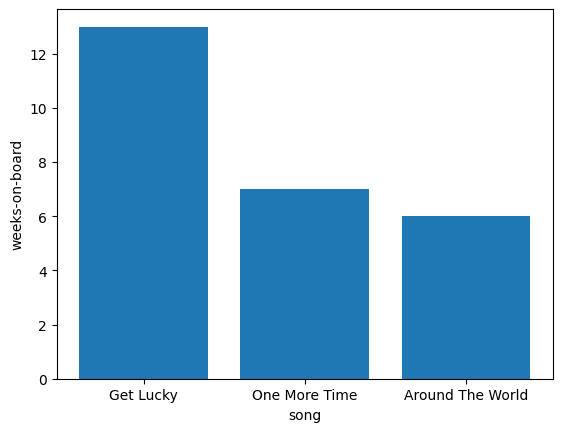

In [235]:
fig, ax = plt.subplots()
ax.bar(top_songs_daft['song'], top_songs_daft['weeks-on-board'])
ax.set_xlabel('song')
ax.set_ylabel('weeks-on-board')
plt.show()

In [236]:
michael_jackson_table = pd.merge(michael_jackson_df_filtered, michael_jackson_topsongs, on='song', how='outer') 
michael_jackson_table

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,1988-01-23,1.0,The Way You Make Me Feel,Michael Jackson,3.0,1.0,10.0
1,1988-01-16,3.0,The Way You Make Me Feel,Michael Jackson,5.0,3.0,9.0
2,1988-01-30,4.0,The Way You Make Me Feel,Michael Jackson,1.0,1.0,11.0
3,1988-01-09,5.0,The Way You Make Me Feel,Michael Jackson,7.0,5.0,8.0
4,1988-01-02,7.0,The Way You Make Me Feel,Michael Jackson,7.0,7.0,7.0
...,...,...,...,...,...,...,...
688,2003-12-27,100.0,One More Chance,Michael Jackson,98.0,83.0,4.0
689,2004-01-03,100.0,One More Chance,Michael Jackson,100.0,83.0,5.0
690,1997-08-23,91.0,Stranger In Moscow,Michael Jackson,NaN,91.0,1.0
691,1997-08-30,97.0,Stranger In Moscow,Michael Jackson,91.0,91.0,2.0


In [237]:
michael_jackson_table_final = michael_jackson_table.drop_duplicates(subset=['song'])
michael_jackson_table_final

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,1988-01-23,1.0,The Way You Make Me Feel,Michael Jackson,3.0,1.0,10.0
18,1983-03-05,1.0,Billie Jean,Michael Jackson,4.0,1.0,7.0
43,1988-04-02,1.0,Man In The Mirror,Michael Jackson,1.0,1.0,9.0
60,1987-10-31,1.0,Bad,Michael Jackson,1.0,1.0,7.0
74,1987-09-19,1.0,I Just Can't Stop Loving You,Michael Jackson With Siedah Garrett,2.0,1.0,7.0
88,1983-04-30,1.0,Beat It,Michael Jackson,2.0,1.0,10.0
113,1995-09-02,1.0,You Are Not Alone,Michael Jackson,NaN,1.0,1.0
133,1988-07-02,1.0,Dirty Diana,Michael Jackson,2.0,1.0,9.0
147,1980-01-19,1.0,Rock With You,Michael Jackson,2.0,1.0,12.0
171,1979-10-13,1.0,Don't Stop 'til You Get Enough,Michael Jackson,2.0,1.0,12.0


In [230]:
michael_jackson_plot = michael_jackson_table_final.sort_values(by=['rank', 'weeks-on-board'], ascending=[True, False])

In [231]:
top_songs_michael = michael_jackson_plot.head(3)
top_songs_michael

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
147,1980-01-19,1.0,Rock With You,Michael Jackson,2.0,1.0,12.0
171,1979-10-13,1.0,Don't Stop 'til You Get Enough,Michael Jackson,2.0,1.0,12.0
192,1972-10-14,1.0,Ben,Michael Jackson,2.0,1.0,11.0


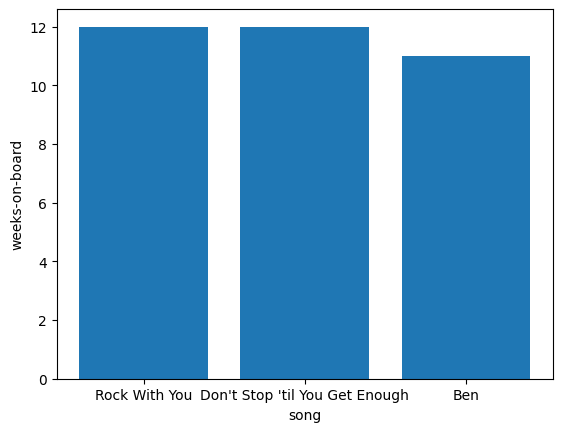

In [232]:
fig, ax = plt.subplots()
ax.bar(top_songs_michael['song'], top_songs_michael['weeks-on-board'])
ax.set_xlabel('song')
ax.set_ylabel('weeks-on-board')
plt.show()

In [183]:
ewf_df_table = pd.merge(ewf_df_filtered, ewf_topsongs, on='song', how='outer') 

In [184]:
ewf_df_table_final = ewf_df_table.drop_duplicates(subset=['song'])
ewf_df_table_final

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,1975-05-24,1,Shining Star,"Earth, Wind & Fire",4.0,1,15
20,1979-09-15,2,After The Love Has Gone,"Earth, Wind & Fire",3.0,2,11
37,1982-01-16,3,Let's Groove,"Earth, Wind & Fire",3.0,3,16
61,1976-02-14,5,Sing A Song,"Earth, Wind & Fire",5.0,5,13
78,1979-07-21,6,Boogie Wonderland,"Earth, Wind & Fire with The Emotions",6.0,6,11
94,1979-02-10,8,September,"Earth, Wind & Fire",9.0,8,13
111,1978-09-16,9,Got To Get You Into My Life,"Earth, Wind & Fire",10.0,9,9
124,1975-09-20,12,That's The Way Of The World,"Earth, Wind & Fire",13.0,12,12
140,1976-10-09,12,Getaway,"Earth, Wind & Fire",13.0,12,13
159,1978-02-11,13,Serpentine Fire,"Earth, Wind & Fire",14.0,13,16


In [238]:
ewf_plot = ewf_df_table_final.sort_values(by=['rank', 'weeks-on-board'], ascending=[True, False])

In [239]:
top_songs_ewf = ewf_plot.head(3)
top_songs_ewf

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,1975-05-24,1,Shining Star,"Earth, Wind & Fire",4.0,1,15
20,1979-09-15,2,After The Love Has Gone,"Earth, Wind & Fire",3.0,2,11
37,1982-01-16,3,Let's Groove,"Earth, Wind & Fire",3.0,3,16


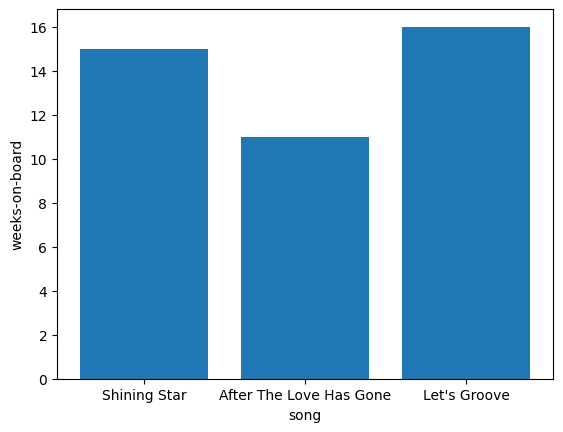

In [240]:
fig, ax = plt.subplots()
ax.bar(top_songs_ewf['song'], top_songs_ewf['weeks-on-board'])
ax.set_xlabel('song')
ax.set_ylabel('weeks-on-board')
plt.show()

In [185]:
stevie_wonder_df_table= pd.merge(stevie_wonder_df_filtered, stevie_wonder_topsongs, on='song', how='outer') 

In [186]:
stevie_wonder_df_final = stevie_wonder_df_table.drop_duplicates(subset=['song'])
stevie_wonder_df_final

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,1973-05-19,1.0,You Are The Sunshine Of My Life,Stevie Wonder,2.0,1.0,10.0
17,1974-11-02,1.0,You Haven't Done Nothin,Stevie Wonder,2.0,1.0,14.0
36,1973-01-27,1.0,Superstition,Stevie Wonder,2.0,1.0,11.0
52,1977-06-04,1.0,Sir Duke,Stevie Wonder,1.0,1.0,10.0
69,1977-01-22,1.0,I Wish,Stevie Wonder,2.0,1.0,8.0
86,1984-10-13,1.0,I Just Called To Say I Love You,Stevie Wonder,2.0,1.0,9.0
112,1985-11-02,1.0,Part-Time Lover,Stevie Wonder,2.0,1.0,9.0
133,1968-12-28,2.0,For Once In My Life,Stevie Wonder,3.0,2.0,9.0
147,1967-07-29,2.0,I Was Made To Love Her,Stevie Wonder,6.0,2.0,8.0
162,1966-02-12,3.0,Uptight (Everything's Alright),Stevie Wonder,16.0,3.0,9.0


In [241]:
stevie_wonder_plot = stevie_wonder_df_final.sort_values(by=['rank', 'weeks-on-board'], ascending=[True, False])

In [242]:
top_songs_stevie = stevie_wonder_plot.head(3)
top_songs_stevie

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
17,1974-11-02,1.0,You Haven't Done Nothin,Stevie Wonder,2.0,1.0,14.0
36,1973-01-27,1.0,Superstition,Stevie Wonder,2.0,1.0,11.0
0,1973-05-19,1.0,You Are The Sunshine Of My Life,Stevie Wonder,2.0,1.0,10.0


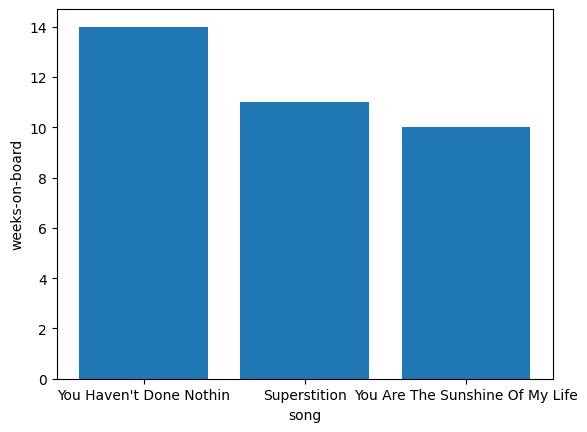

In [243]:
fig, ax = plt.subplots()
ax.bar(top_songs_stevie['song'], top_songs_stevie['weeks-on-board'])
ax.set_xlabel('song')
ax.set_ylabel('weeks-on-board')
plt.show()

In [187]:
bee_gees_df_table= pd.merge(bee_gees_df_filtered, bee_gees_topsongs, on='song', how='outer') 
bee_gees_df_table

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,1971-08-14,1.0,How Can You Mend A Broken Heart,Bee Gees,1.0,1.0,8.0
1,1971-08-21,1.0,How Can You Mend A Broken Heart,Bee Gees,1.0,1.0,9.0
2,1971-08-07,1.0,How Can You Mend A Broken Heart,Bee Gees,6.0,1.0,7.0
3,1971-08-28,1.0,How Can You Mend A Broken Heart,Bee Gees,1.0,1.0,10.0
4,1971-09-04,2.0,How Can You Mend A Broken Heart,Bee Gees,1.0,1.0,11.0
...,...,...,...,...,...,...,...
513,1973-04-07,94.0,Saw A New Morning,Bee Gees,96.0,94.0,3.0
514,1973-03-31,96.0,Saw A New Morning,Bee Gees,99.0,96.0,2.0
515,1973-03-24,99.0,Saw A New Morning,Bee Gees,NaN,99.0,1.0
516,NaN,NaN,Stayin Alive,NaN,NaN,NaN,NaN


In [188]:
bee_gees_df_final = bee_gees_df_table.drop_duplicates(subset=['song'])
bee_gees_df_final

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,1971-08-14,1.0,How Can You Mend A Broken Heart,Bee Gees,1.0,1.0,8.0
15,1978-01-07,1.0,How Deep Is Your Love,Bee Gees,1.0,1.0,16.0
48,1979-01-13,1.0,Too Much Heaven,Bee Gees,1.0,1.0,9.0
69,1979-03-24,1.0,Tragedy,Bee Gees,2.0,1.0,7.0
89,1979-06-09,1.0,Love You Inside Out,Bee Gees,3.0,1.0,8.0
108,1978-02-04,1.0,Stayin' Alive,Bee Gees,3.0,1.0,9.0
135,1978-04-29,1.0,Night Fever,Bee Gees,1.0,1.0,13.0
155,1975-08-16,1.0,Jive Talkin',Bee Gees,1.0,1.0,12.0
172,1976-09-04,1.0,You Should Be Dancing,Bee Gees,2.0,1.0,10.0
192,1976-12-04,3.0,Love So Right,Bee Gees,3.0,3.0,12.0


In [244]:
bee_gees_plot = bee_gees_df_final.sort_values(by=['rank', 'weeks-on-board'], ascending=[True, False])

In [249]:
top_songs_bee_gees = bee_gees_plot.head(3)
top_songs_bee_gees

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
15,1978-01-07,1.0,How Deep Is Your Love,Bee Gees,1.0,1.0,16.0
135,1978-04-29,1.0,Night Fever,Bee Gees,1.0,1.0,13.0
155,1975-08-16,1.0,Jive Talkin',Bee Gees,1.0,1.0,12.0


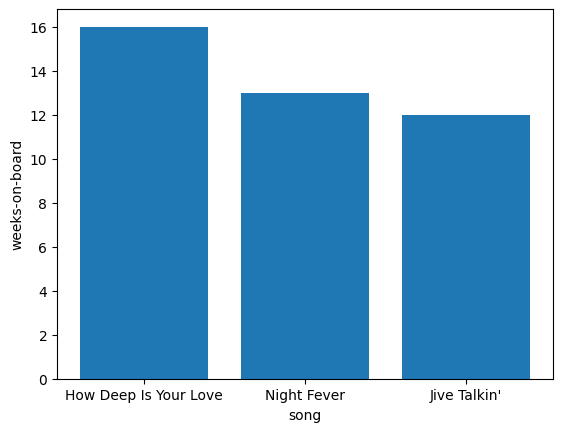

In [256]:
fig, ax = plt.subplots()
ax.bar(top_songs_bee_gees['song'], top_songs_bee_gees['weeks-on-board'])
ax.set_xlabel('song')
ax.set_ylabel('weeks-on-board')


plt.show()

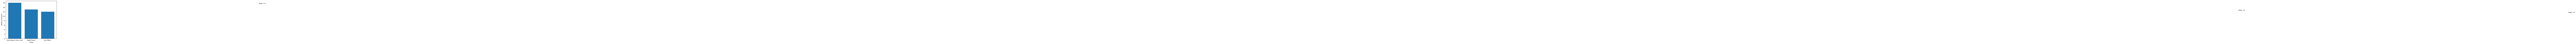

In [255]:
fig, ax = plt.subplots()
ax.bar(top_songs_bee_gees['song'], top_songs_bee_gees['weeks-on-board'])
ax.set_xlabel('song')
ax.set_ylabel('weeks-on-board')
for i, row in top_songs_bee_gees.iterrows():
    ax.text(row.name, row['weeks-on-board'], f"Peak: {row['peak-rank']}", ha='center', va='top')

plt.show()